In [1]:
from pylab import *
import numpy as np
from os import listdir
from sklearn.svm import LinearSVC
import cv2
from PIL import Image
from sklearn import svm
import imagehash
from scipy.cluster.vq import *
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import linear_model

In [3]:
genuine_image_filenames = listdir("signatures/full_org")
forged_image_filenames = listdir("signatures/full_forg")

genuine_image_paths = "signatures/full_org"
forged_image_paths = "signatures/full_forg"

train_X=[]
train_Y=[]
for im in genuine_image_filenames[0:1320]:
    image_path = genuine_image_paths + "/" + im
    img=cv2.imread(image_path)
    train_X.append(img)
    train_Y.append(1)

for im in forged_image_filenames[0:1320]:
    image_path = forged_image_paths + "/" + im
    img=cv2.imread(image_path)
    train_X.append(img)
    train_Y.append(0)
    
print(np.shape(train_X))
print(np.shape(train_Y))

(2640,)
(2640,)


In [5]:
np.shape(train_X[0])

(385, 534, 3)

In [6]:
train_X_new=[]
for i in train_X:
    train_X_new.append(cv2.cvtColor(i, cv2.COLOR_BGR2GRAY))
    
train_X_final=[]
for i in train_X_new:
    img=cv2.resize(i, (120,120), interpolation = cv2.INTER_AREA)
    train_X_final.append(img)

In [7]:
np.shape(train_X_final)

(2640, 120, 120)

In [8]:
def img_to_1d_greyscale(img):
    # function for loading, resizing and converting an image into greyscale
    # used for logistic regression
    return(pd.Series(img.flatten()))


In [10]:
import pandas as pd
size = (120, 120)

# defining empty containers
X_train = pd.DataFrame(np.zeros((2640, size[0] * size[1])))
#X_test = pd.DataFrame(np.zeros((362, size[0] * size[1])))

In [11]:
counter_train = 0

for i in range(len(train_X_final)):
    X_train.iloc[counter_train, :] = img_to_1d_greyscale(train_X_final[i]) / 255
    counter_train += 1

In [12]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,14390,14391,14392,14393,14394,14395,14396,14397,14398,14399
0,0.941176,0.937255,0.925490,0.933333,0.937255,0.941176,0.933333,0.929412,0.933333,0.933333,...,0.945098,0.941176,0.941176,0.937255,0.952941,0.941176,0.945098,0.941176,0.937255,0.941176
1,0.945098,0.945098,0.937255,0.941176,0.937255,0.937255,0.937255,0.941176,0.949020,0.945098,...,0.949020,0.952941,0.949020,0.949020,0.952941,0.952941,0.952941,0.952941,0.949020,0.945098
2,0.937255,0.945098,0.949020,0.952941,0.952941,0.956863,0.952941,0.956863,0.952941,0.949020,...,0.960784,0.956863,0.964706,0.956863,0.952941,0.956863,0.964706,0.960784,0.960784,0.956863
3,0.929412,0.929412,0.925490,0.933333,0.925490,0.929412,0.937255,0.929412,0.937255,0.933333,...,0.941176,0.937255,0.937255,0.937255,0.937255,0.945098,0.937255,0.933333,0.941176,0.933333
4,0.933333,0.941176,0.941176,0.937255,0.933333,0.941176,0.949020,0.937255,0.937255,0.937255,...,0.945098,0.949020,0.941176,0.949020,0.945098,0.949020,0.945098,0.941176,0.945098,0.949020
5,0.945098,0.952941,0.952941,0.949020,0.952941,0.952941,0.956863,0.949020,0.937255,0.956863,...,0.956863,0.956863,0.960784,0.956863,0.952941,0.964706,0.956863,0.956863,0.964706,0.956863
6,0.933333,0.937255,0.937255,0.925490,0.929412,0.929412,0.929412,0.929412,0.933333,0.933333,...,0.933333,0.941176,0.933333,0.937255,0.929412,0.933333,0.933333,0.937255,0.925490,0.933333
7,0.933333,0.929412,0.937255,0.933333,0.941176,0.929412,0.949020,0.941176,0.933333,0.929412,...,0.945098,0.945098,0.949020,0.937255,0.945098,0.949020,0.952941,0.945098,0.941176,0.945098
8,0.945098,0.945098,0.956863,0.952941,0.952941,0.945098,0.949020,0.937255,0.945098,0.941176,...,0.960784,0.968627,0.964706,0.968627,0.968627,0.964706,0.952941,0.956863,0.956863,0.952941
9,0.937255,0.941176,0.929412,0.933333,0.937255,0.937255,0.941176,0.937255,0.937255,0.937255,...,0.937255,0.937255,0.941176,0.925490,0.929412,0.933333,0.933333,0.933333,0.929412,0.929412


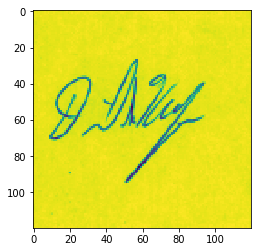

In [13]:
plt.imshow(np.reshape(X_train.iloc[3, ].values, size))

In [14]:
X_train.loc[0,:]

0        0.941176
1        0.937255
2        0.925490
3        0.933333
4        0.937255
5        0.941176
6        0.933333
7        0.929412
8        0.933333
9        0.933333
10       0.937255
11       0.933333
12       0.933333
13       0.929412
14       0.933333
15       0.937255
16       0.941176
17       0.937255
18       0.941176
19       0.937255
20       0.929412
21       0.937255
22       0.945098
23       0.937255
24       0.945098
25       0.945098
26       0.937255
27       0.933333
28       0.937255
29       0.933333
           ...   
14370    0.945098
14371    0.941176
14372    0.952941
14373    0.956863
14374    0.949020
14375    0.949020
14376    0.952941
14377    0.941176
14378    0.945098
14379    0.949020
14380    0.949020
14381    0.952941
14382    0.949020
14383    0.949020
14384    0.952941
14385    0.949020
14386    0.945098
14387    0.937255
14388    0.941176
14389    0.941176
14390    0.945098
14391    0.941176
14392    0.941176
14393    0.937255
14394    0

In [15]:
from sklearn.linear_model import LogisticRegression 

In [16]:
logreg_classifier = LogisticRegression(solver = 'lbfgs')
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
train_X,valid_X,train_label,valid_label = train_test_split(X_train, train_Y, test_size=0.2, random_state=13)

In [17]:
print(len(train_label))
print(len(valid_label))

2112
528


In [18]:
logreg_classifier.fit(train_X,train_label)

C:\Users\Saurav\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
logreg_pred = logreg_classifier.predict(valid_X)

In [20]:
logreg_pred.shape

(528,)

In [21]:
def pretty_cm(y_pred, y_truth, labels):
    # pretty implementation of a confusion matrix
    cm = metrics.confusion_matrix(y_truth, y_pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'BuGn_r')
    # labels, title and ticks
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('Actual label')
    ax.set_title('Accuracy: {0}'.format(metrics.accuracy_score(y_truth, y_pred)), size = 15) 
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)

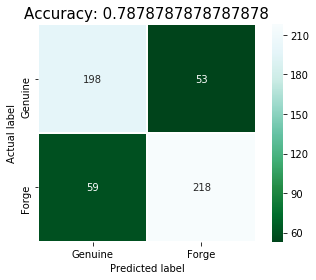

In [22]:
pretty_cm(logreg_pred, valid_label, ['Genuine', 'Forge'])

In [23]:
score=metrics.accuracy_score(valid_label,logreg_pred)

In [24]:
score

0.7878787878787878

# Naive Bayes 

In [25]:
from sklearn.naive_bayes import MultinomialNB

In [26]:
nb=MultinomialNB()

In [27]:
nb.fit(train_X,train_label)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [28]:
nb_pred = nb.predict(valid_X)

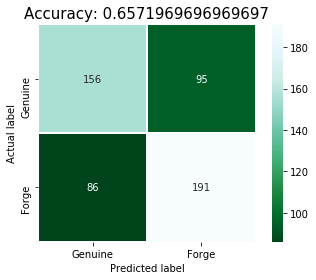

In [29]:
pretty_cm(nb_pred, valid_label, ['Genuine', 'Forge'])

In [30]:
score=metrics.accuracy_score(valid_label,nb_pred)

In [31]:
score

0.6571969696969697